# Прогнозирование популярного продукта для интернет-магазина по продаже компьютерных игр

## Описание проекта

### Описание исследования.

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

### Цель исследования.
    
Суть исследования:
Нам нужно выявить определяющие успешность игры закономерности.

### Задачи исследования.

Действия, необходимые для достижения поставленной цели:
Нам предстоит сделать предварительный анализ данных для того, чтобы позволить сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Исходные данные.
    
В нашем распоряжении из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Также перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

##### Путь к файлу:

•	`/datasets/games.csv`.


##### Таблица `games` :

•	`Name` — название игры

•	`Platform` — платформа

•	`Year_of_Release` — год выпуска

•	`Genre` — жанр игры

•	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

•	`EU_sales` — продажи в Европе (миллионы проданных копий)

•	`JP_sales` — продажи в Японии (миллионы проданных копий)

•	`Other_sales` — продажи в других странах (миллионы проданных копий)

•	`Critic_Score` — оценка критиков (максимум 100)

•	`User_Score` — оценка пользователей (максимум 10)

•	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Примечание:** Данные за 2016 год могут быть неполными.

### Вывод

Нам известны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Этого должно хватить для того, чтобы выявить определяющие успешность игры закономерности и позволить сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

Импортируем библиотеку `Pandas`:

In [1]:
import pandas as pd

### Чтение файла

In [2]:
df = pd.read_csv('/datasets/games.csv')   # Прочитаем файл games.csv из папки /datasets
                                                # и сохраним его в переменной df
display(df) # Выводим на экран первые десять строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info() # Получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum() # подсчитаем количество пропущенных значений в таблице

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
display(df.isnull().sum()) # проверим наличие нулевых значений

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Из описания таблицы нам стало известно, что она содержит 11 столбцов и 16715 строк. Тип данных в столбцах — `float`, `object`. Имеются пропущенные значения. Столбец `'Year_of_Release'` имеет вещественный тип данных (в предобработке необходимо привести его к типу `Datetime`). Столбец `'User_Score'` имеет строковый тип данных (в предобработке необходимо привести его к типу `float`). Наименование столбцов содержат разный регист.

## Предобработка данных

### Приведение столбцов к нижнему регистру

In [6]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# выведем первые пять строк для проверки результата
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Как видим названия столбцов приведены к нижнему регистру.

### Приведение значений столбцов к нижнему регистру

In [8]:
# Приведем значения столбцов к нижнему регистру
for column_name in ["name", "platform", 'genre']:
    df[column_name] = df[column_name].str.lower()

# выведем первые пять строк для проверки результата
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка дубликатов

#### Обработка неявных дубликатов

Из задания нам известно, что столбец `'user_score'` содержит аббревиатуру `'tbd'`, проверим наличие этих значений:

In [9]:
# посмотрим на уникальные значения столбца 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

И правда, в столбце `'user_score'` содержатся значения `'tbd'`.

Данная **абревиатура TBD** - от английского **To Be Determined (будет определено)** или **To Be Decided (будет решено)**. Используется, если какая-то информация еще не определена или решение по вопросу не принято.

In [10]:
# посчитаем количество значений 'tbd' в столбце
print('Количество значений "tbd" = ', df[df['user_score'] == 'tbd']['user_score'].count())

Количество значений "tbd" =  2424


Для дальнейшего подсчета рейтинга по столбцу `'user_score'` нам необходимо привести его данные к вещественному типу `'float'`, но чтобы это сделать нужно заменить значения `'tbd'` на `'None'`.

In [11]:
# заменим значения 'tbd' на 'None'
df.loc[df['user_score'] == 'tbd', 'user_score'] = None

In [12]:
# посмотрим на уникальные значения столбца 'user_score' после изменения
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Теперь вместо `'tbd'` появились значения `'None'`.

#### Обработка явных дубликатов

Проверим наличие явных дубликатов в датасете:

In [13]:
print("Количество явных дубликатов в датасете 'df': {}".format(df.duplicated().sum()))

Количество явных дубликатов в датасете 'df': 0


Явные дубликаты отсутствуют.

### Обработка типов значений

#### Приведение данных к вещественному типу

Для дальнейшего подсчета рейтинга по столбцу `'user_score'` нам необходимо привести его данные к вещественному типу `'float'`.
После замены значений столбца `'user_score'` можно изменить тип данных c `'object'` на `'float'`:

In [14]:
# изменяем тип данных столбца 'user_score' c 'object' на 'float'
df['user_score'] = df['user_score'].astype(float)
# проверим изменения
print('Тип значений столбца "user_score":', df['user_score'].dtypes)

Тип значений столбца "user_score": float64


Как видим тип данных изменился.

#### Приведение данных к целочисленному типу

 Столбец `'year_of_release'` содержит вещественный тип данных, а нам для удобства и дальнейшего построения графиков нужен формат `'int'`. также придется обработать пропуски в этом столбце для преобразования к целочисленному типу:

In [15]:
# проверим количество пропусков по столбцу 'year_of_release'
print('Количество пропусков в столбце "year_of_release" =', df['year_of_release'].isna().sum())

Количество пропусков в столбце "year_of_release" = 269


In [16]:
# проверим какую долю от общего чсла значений составляют пропуски по столбцу 'year_of_release'
print("Доля пропусков в столбце 'year_of_release' от общего числа значений = {:.1%}"
      .format(df['year_of_release'].isna().sum() / len(df['year_of_release'])))

Доля пропусков в столбце 'year_of_release' от общего числа значений = 1.6%


In [17]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

Как видно пропуски в столбце `'year_of_release'` составляют всего 1,6% от общего количества значений в столбце, поэтому их можно удалить:

In [18]:
# удаляем строки содержащие пустые значения по столбцу 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

# приведем тип данных столбца 'year_of_release' к формату 'int'
df['year_of_release'] = df['year_of_release'].astype('int')

# посмотрим на изменения
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Тип данных столбца `'year_of_release'` поменялся на `'int'`.

### Обработка пропусков

In [19]:
# подсчитаем количество пропущенных значений в таблице
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

#### Столбец `'name'`

Так как количество пропусков в столбце `'name'` всего два, то просто удалим эти строки:

In [20]:
# удаляем строки содержащие пустые значения по столбцу 'name'
df.dropna(subset=['name'], inplace=True)

In [21]:
# проверим изменения
print('Количество пропусков в столбце "name" = ', df['name'].isna().sum())

Количество пропусков в столбце "name" =  0


#### Столбцы `'critic_score'`, `'user_score'` и `'rating'`

Так как при просмотре уникальных значений рейтингов в реальных данных присутствуют нулевые значения, то заменим пропуски по столбцам `'critic_score'`, `'user_score'` и `'rating'` значениями `"-1"` для отделения их от остальных данных.

In [22]:
# заменяем пропуски столбцов 'critic_score', 'user_score' и 'rating' на значение "-1"
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

# проверяем изменения
print('Количество пропусков в столбце "critic_score" =', df['critic_score'].isna().sum())
print('Количество пропусков в столбце "user_score" =', df['user_score'].isna().sum())
print('Количество пропусков в столбце "rating" =', df['rating'].isna().sum())

Количество пропусков в столбце "critic_score" = 0
Количество пропусков в столбце "user_score" = 0
Количество пропусков в столбце "rating" = 0


In [23]:
# проверим общие изменения в датасете на наличие пропусков
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Вывод

В процессе предобработки данных мы привели столбцы к нижнему регистру, проверили и обработали неявные и явные дубликаты, привели данные к необходимому для дальнейшего анализа типу данных, а также обработали и заменили пропущенные значения.

## Подготовка данных

### Подсчет суммарных продаж во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [24]:
# Подсчитываем количество продаж во всех регионах и записываем их в новый столбец 'number_of_sales'
df['number_of_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# выводим для просмотра нового столбца первые пять строк датасета
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


Новый столбец по подсчету суммарных продаж во всех регионах `'number_of_sales'` добавлен.

### Вывод

Мы посчитали количество продаж во всех регионах и записали их в новый столбец `'number_of_sales'`. Теперь можно переходить к исследовательскому анализу данных.

## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

Для визуализации данных и построения графиков импортируем библиотеку `Matplotlib`:

In [25]:
# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

Посмотрим, сколько игр выпускалось в разные годы:

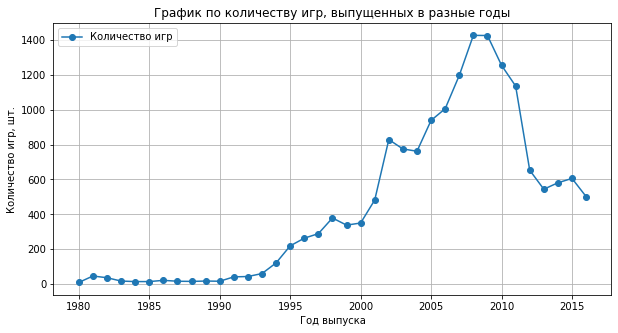

In [26]:
# сгруппируем данные по столбцу 'year_of_release' и применим функцию 'count' для подсчета количества игр,
# так же обновим индексы после группировки
df_number_games_years = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()

# зададим размер графика
plt.figure(figsize=(10, 5))

# построим график по количеству игр, выпущенных в разные годы, 
# а также для читаемости добавим легенду и названия осей
plt.plot(df_number_games_years['year_of_release'], df_number_games_years['name'], '-o');

# добавляем на график его название
plt.title('График по количеству игр, выпущенных в разные годы')

# обозначаем ось абсцис "х"
plt.xlabel('Год выпуска')

# обозначаем ось ординат "у"
plt.ylabel('Количество игр, шт.')

# добавляем на график легенду
plt.legend(['Количество игр'])

# отображаем сетку
plt.grid(True)

# отображение графика
plt.show()

Посмотрим, как менялись продажи по годам:

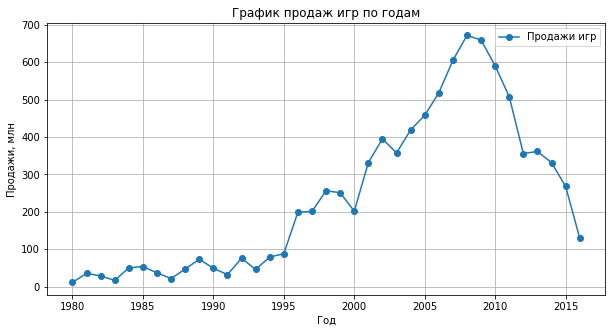

In [27]:
# составим сводную таблицу по продажам, применив функцию 'sum' для подсчета продаж, так же обновим индексы
df_sales = (df.pivot_table(index='year_of_release', values='number_of_sales', aggfunc=('sum'))).reset_index()

# зададим размер графика
plt.figure(figsize=(10, 5))

# построим график по продажам, 
# а также для читаемости добавим легенду и названия осей
plt.plot(df_sales['year_of_release'], df_sales['number_of_sales'], '-o');

# добавляем на график его название
plt.title('График продаж игр по годам')

# обозначаем ось абсцис "х"
plt.xlabel('Год')

# обозначаем ось ординат "у"
plt.ylabel('Продажи, млн')

# добавляем на график легенду
plt.legend(['Продажи игр'])

# отображаем сетку
plt.grid(True)

# отображение графика
plt.show()

Как видим начиная с 2008 года в  период мирового финансового (ипотечного) кризиса на графике происходит значительный спад. 
В связи с этой картиной возьмем период не ранее 2008 года и посмотрим на данные относительно недавних современных платформ.

### Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам:

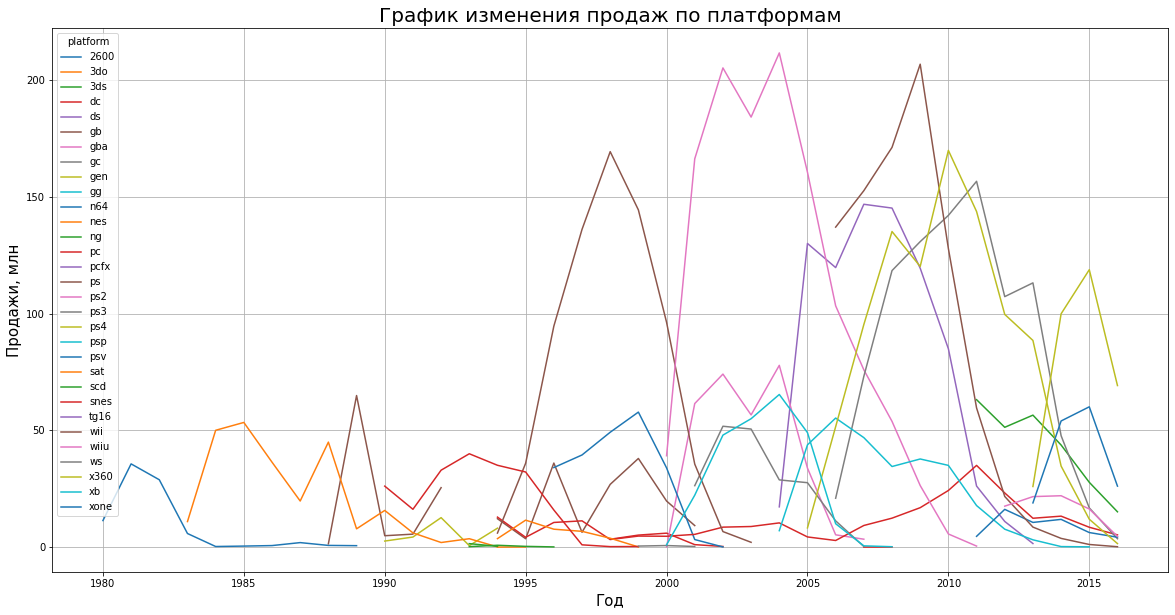

In [28]:
# составим сводную таблицу продаж по платформам и построим график
df_sale_platforms = df.pivot_table(index='year_of_release', columns='platform', values='number_of_sales', aggfunc='sum')

# построим график и зададим его размер
df_sale_platforms.plot(figsize=(20,10))
plt.title('График изменения продаж по платформам', fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Продажи, млн', fontsize=15)
plt.grid(True)
plt.show()

### Платформы с наибольшими суммарными продажами

In [29]:
# составим сводную таблицу по платформам и посчитаем по ним сумму продаж, применив функцию 'sum'
df_big_sale_platform = df.pivot_table(index='platform',values='number_of_sales', aggfunc='sum')

# посмотрим на первые десять строк сводной таблицы
display(df_big_sale_platform.sort_values(by='number_of_sales', ascending=False).head(10))

,number_of_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Составим таблицу с топ-10 платформами с наибольшими суммарными продажами:

In [30]:
# составляем таблицу с топ-10 платформами
df_top10_platforms = (df[(df['platform'] == 'ps2') |
                          (df['platform'] == 'x360')|
                          (df['platform'] == 'ps3') | 
                          (df['platform'] == 'wii') | 
                          (df['platform'] == 'ds')  | 
                          (df['platform'] == 'ps')  | 
                          (df['platform'] == 'ps4') | 
                          (df['platform'] == 'gba') | 
                          (df['platform'] == 'psp') | 
                          (df['platform'] == '3ds')])

In [31]:
# проверим список платформ через уникальные значения
print(df_top10_platforms['platform'].unique())

['wii' 'ds' 'x360' 'ps3' 'ps2' 'gba' 'ps4' '3ds' 'ps' 'psp']


In [32]:
# выведем первые пять строк топ-10 платформ
display(df_top10_platforms.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


#### Построение распределения по годам

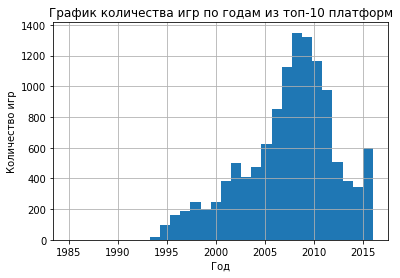

In [33]:
# построим гистограмму нашего топа по годам
df_top10_platforms['year_of_release'].hist(bins=30)
plt.title('График количества игр по годам из топ-10 платформ')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Как видно до 1993 года имеются нулевые или близкие к нулю данные. Поэтому период до 1993 года отбросим.

In [34]:
# отбрасываем данные для топ-10 платформ до 1993 года
df_top10_platforms = df_top10_platforms[df_top10_platforms['year_of_release'] >= 1993]

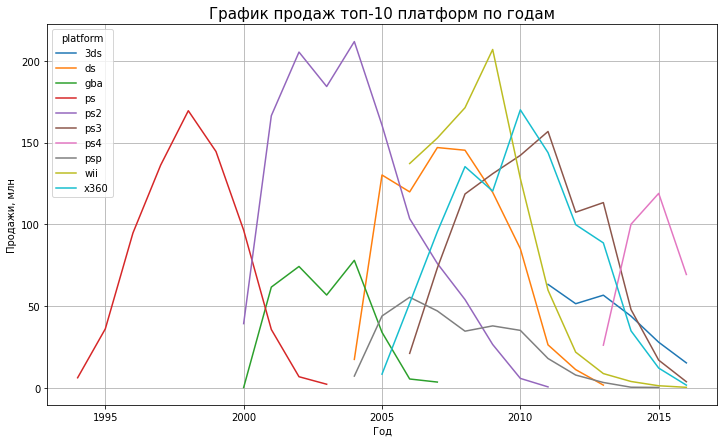

In [35]:
# составляем сводную таблицу и строим распределение
(df_top10_platforms
 .pivot_table(index='year_of_release', columns='platform', values='number_of_sales', aggfunc='sum')
 .plot(figsize=(12,7)))

plt.title('График продаж топ-10 платформ по годам', fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Продажи, млн',fontsize=10)
plt.grid(True)
plt.show()

#### Характерный срок появления новых и исчезновения старых платформ

In [36]:
# составим новую таблицу по сгруппированным данным
df_term_platform = df.groupby(['platform', 'year_of_release']).agg({'number_of_sales':'sum'}).reset_index()

# выведем первые пять строк таблицы
display(df_term_platform['platform'].value_counts().head())

pc     26
gb     13
ps2    12
nes    12
psp    12
Name: platform, dtype: int64

Определим самое встречаемое значение в данных, это и будет ориентировочный срок за который появляются новые и исчезают старые платформы:

In [37]:
# определяем самое встречаемое значение
df_mode_platform = df_term_platform['platform'].value_counts().mode()

print('Ориентировочный срок за который появляются новые и исчезают старые платформы составляет {0} лет'
      .format(df_mode_platform[0]))

Ориентировочный срок за который появляются новые и исчезают старые платформы составляет 12 лет


In [38]:
# определим среднее значение срока за который появляются новые и исчезают старые платформы
print('Среднее значение срока за который появляются новые и исчезают старые платформы составляет {:.2} лет'
      .format(df_term_platform['platform'].value_counts().mean()))

Среднее значение срока за который появляются новые и исчезают старые платформы составляет 7.7 лет


**Вывод**

Ориентировочный срок за который появляются новые и исчезают старые платформы составляет 12 лет. Среднее значение срока за который появляются новые и исчезают старые платформы составляет 7.7 лет.

### Определение актуального периода

В результате исследования предыдущих вопросов актуальный период можно определить с 2008 года, поэтому данные за предыдущие годы учитывать не будем.

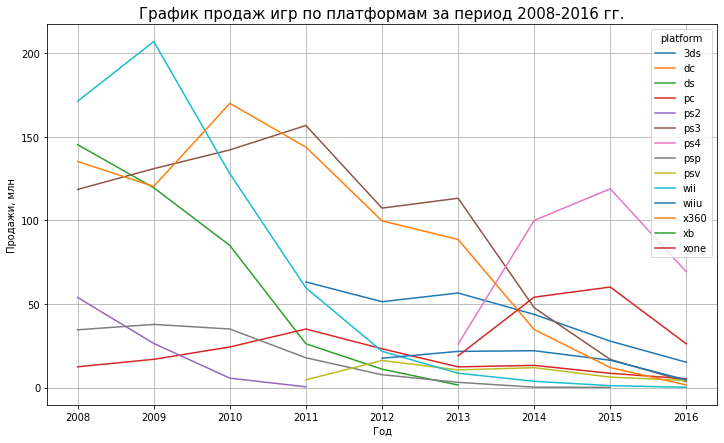

In [39]:
# создаем новую таблицу по данным 2008-2016 годов
df_crisis_2008 = (df[df['year_of_release'] >= 2008])

# составляем сводную таблицу и рисуем график продаж по платформам
(df_crisis_2008
 .pivot_table(index='year_of_release', columns='platform', values='number_of_sales', aggfunc='sum')
 .plot(figsize=(12,7)))
 
plt.title('График продаж игр по платформам за период 2008-2016 гг.', fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Продажи, млн',fontsize=10)
plt.grid(True)
plt.show()

**Вывод**

Как видим начиная с 2008 года в период мирового финансового (ипотечного) кризиса на графике происходит значительный спад.

### Потенциально прибыльные платформы

Посмотрим какие платформы лидируют по продажам, растут или падают. Для этого сгруппируем данные в новую таблицу и выделим несколько потенциально прибыльных платформ.

In [40]:
# сгруппируем данные в новую таблицу
df_potentially_profitable_platforms = df_crisis_2008.groupby(['platform']).agg({'number_of_sales':'sum'})

# отсортируем по убыванию и выведем первые пять самых прибыльных по продажам платформ
display(df_potentially_profitable_platforms.sort_values(by='number_of_sales', ascending=False).head())

,number_of_sales
platform,
ps3,837.19
x360,805.96
wii,601.26
ds,388.60
ps4,314.14


**Вывод**

Как видим из таблицы в топ-5 самых потенциально прибыльных платформ вошли: 
- 1 место - PlayStation 3
- 2 место (с небольшим отрывом) - Xbox 360
- 3 место - Nintendo Wii
- 4 место - Nintendo DS
- 5 место - PlayStation 4

Возможно с появлением мобильных гаджетов нового поколения продажи платформ заметно снижались, а первые три места топа значительно опережают остальных, возможно они пользовались большим спросом из-за широкого круга покупателей и ценовой категорией на продукт.

### График «ящик с усами» по глобальным продажам игр

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

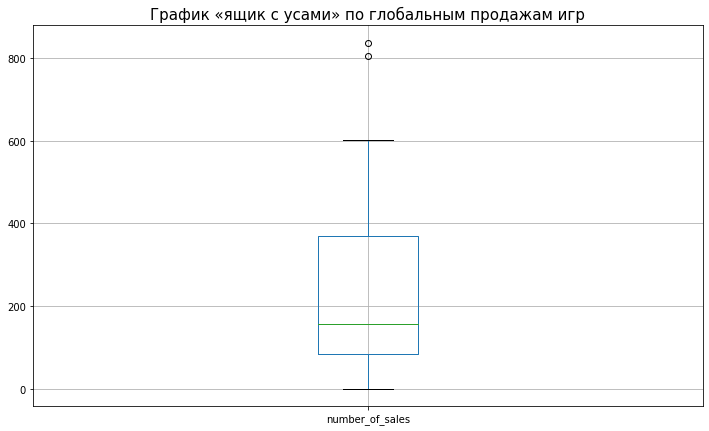

In [41]:
# для построения графика используем "boxplot"
df_potentially_profitable_platforms.boxplot('number_of_sales', figsize=(12,7))
plt.title('График «ящик с усами» по глобальным продажам игр', fontsize=15)
plt.show()

По графику можно сказать, что самые большие продажи находятся в зоне выбросов.

In [42]:
# посмотрим на числовые характеристики продаж
print(df_potentially_profitable_platforms['number_of_sales'].describe())

count     14.000000
mean     276.754286
std      282.817694
min        0.040000
25%       83.240000
50%      155.305000
75%      369.985000
max      837.190000
Name: number_of_sales, dtype: float64


Построим график продаж по платформам:

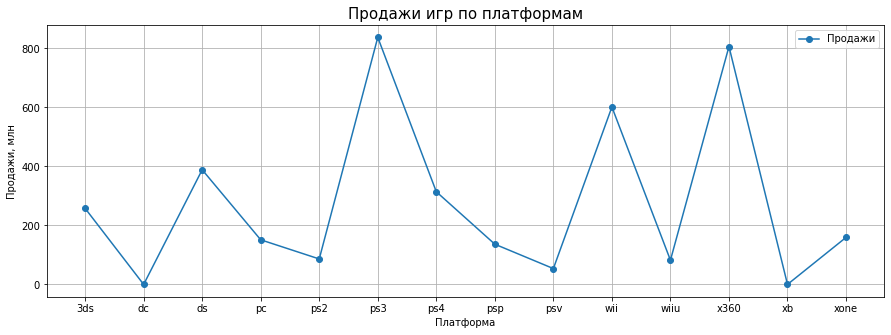

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(df_potentially_profitable_platforms, '-o')

plt.title('Продажи игр по платформам', fontsize=15)
plt.xlabel('Платформа',fontsize=10)
plt.ylabel('Продажи, млн',fontsize=10)
plt.legend(['Продажи'])
plt.grid(True)
plt.show()

Для более детального анализа посмотрим на среднее продаж по платформам. Для этого создадим новую таблицу и построим график.

In [44]:
# сгруппируем данные в новую таблицу и посчитаем средние продажи по платформам
df_potentially_profitable_platforms_mean = df_crisis_2008.groupby(['platform']).agg({'number_of_sales':'mean'})

Построим график продаж (среднее) по платформам:

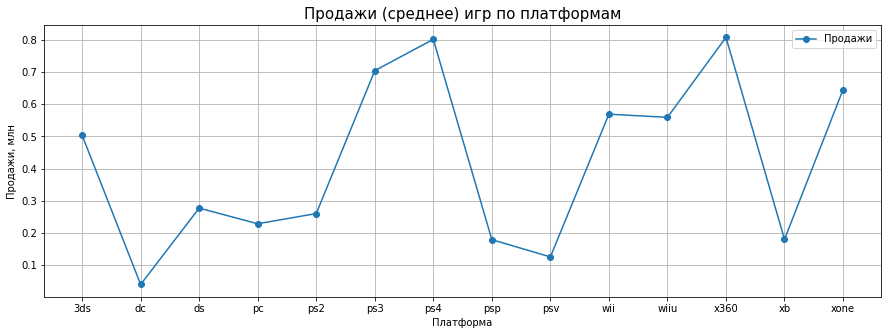

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(df_potentially_profitable_platforms_mean, '-o')

plt.title('Продажи (среднее) игр по платформам', fontsize=15)
plt.xlabel('Платформа',fontsize=10)
plt.ylabel('Продажи, млн',fontsize=10)
plt.legend(['Продажи'])
plt.grid(True)
plt.show()

**Вывод**

По графикам можно сказать, что значения по глобальным продажам игр в разбивке по платформам очень разносторонние, а так же мы определили, что самые большие продажи находятся в зоне выбросов. Касаемо средних продаж наблюдается такая же картина с высокой волатильностью.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Так как я равнодушен к консолям :) для проведения анализа будем использовать данные по ПК. Для этого создадим новую таблицу по платформе ПК:

In [46]:
# создаем новую таблицу для платформы ПК
df_personal_computer = df[df['platform'] == 'pc']

# выводим на экран первые пять строк новой таблицы
display(df_personal_computer.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
85,the sims 3,pc,2009,simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,world of warcraft,pc,2004,role-playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,microsoft flight simulator,pc,1996,simulation,3.22,1.69,0.0,0.20,-1.0,-1.0,-1,5.11
218,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83


Для построения диаграммы рассеяния и определения корреляции данных, выделим необходимые нам столбцы в новую таблицу `'df_scatter_pc'`:

In [47]:
# выделяем необходимые нам для расчетов столбцы в новую таблицу 'df_scatter_pc'
df_scatter_pc = df_personal_computer[['number_of_sales', 'critic_score', 'user_score']]

# посмотрим на первые пять строк таблицы
display(df_scatter_pc.head())

,number_of_sales,critic_score,user_score
85,8.01,86.0,7.6
138,6.29,93.0,7.3
192,5.14,88.0,4.0
195,5.11,-1.0,-1.0
218,4.83,93.0,8.2


Посчитаем корреляцию между отзывами и продажами:

In [48]:
# считаем корреляцию
display(df_scatter_pc.corr())

,number_of_sales,critic_score,user_score
number_of_sales,1.000000,0.078896,0.008303
critic_score,0.078896,1.000000,0.746761
user_score,0.008303,0.746761,1.000000


Построим диаграмму рассеяния:

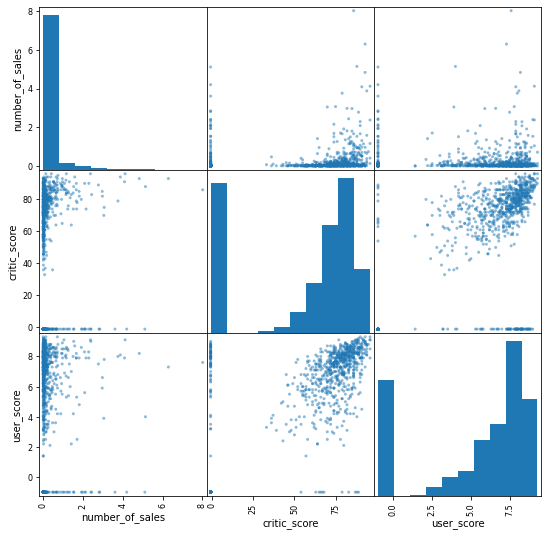

In [49]:
# диаграмма рассеяния строится через plotting.scatter_matrix()
pd.plotting.scatter_matrix(df_scatter_pc, figsize=(9, 9), grid=True)
plt.show()

**Вывод**

Из матрицы корреляции видно, что есть положительная корреляция между рейтингом пользователей и рейтингом критиков, а между оценками и уровнем продаж значимой корреляции нет.

### Соотнесение вывода с продажами игр на других платформах

Для проведения сравнения возьмем первые три платформы из нашего топ-5 платформ по рейтингу продаж: `'ps3'`, `'x360'` и `'wii'`.

#### Платформа `'ps3'`

In [50]:
# создаем новую таблицу для платформы 'ps3'
df_playStation_3 = df[df['platform'] == 'ps3']

# выводим на экран первые пять строк новой таблицы
display(df_playStation_3.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,call of duty: modern warfare 3,ps3,2011,shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,call of duty: black ops,ps3,2010,shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,gran turismo 5,ps3,2010,racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


Для построения диаграммы рассеяния и определения корреляции данных, выделим необходимые нам столбцы в новую таблицу `'df_scatter_ps3'`:

In [51]:
# выделяем необходимые нам для расчетов столбцы в новую таблицу 'df_scatter_ps3'
df_scatter_ps3 = df_playStation_3[['number_of_sales', 'critic_score', 'user_score']]

# посмотрим на первые пять строк таблицы
display(df_scatter_ps3.head())

,number_of_sales,critic_score,user_score
16,21.05,97.0,8.2
34,13.79,83.0,5.3
37,13.33,88.0,3.2
41,12.63,88.0,6.4
54,10.70,84.0,7.5


Посчитаем корреляцию между отзывами и продажами:

In [52]:
# считаем корреляцию
display(df_scatter_ps3.corr())

,number_of_sales,critic_score,user_score
number_of_sales,1.000000,0.353875,0.273166
critic_score,0.353875,1.000000,0.824728
user_score,0.273166,0.824728,1.000000


Построим диаграмму рассеяния:

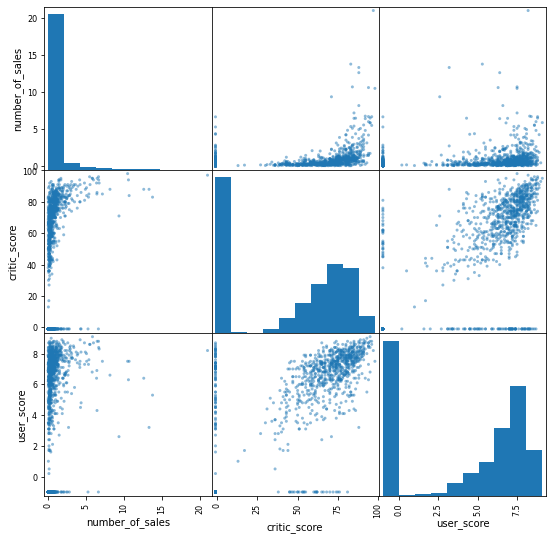

In [53]:
pd.plotting.scatter_matrix(df_scatter_ps3, figsize=(9, 9), grid=True)
plt.show()

#### Платформа `'x360'`

In [54]:
# создаем новую таблицу для платформы 'x360'
df_xbox_360 = df[df['platform'] == 'x360']

# выводим на экран первые пять строк новой таблицы
display(df_xbox_360.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Для построения диаграммы рассеяния и определения корреляции данных, выделим необходимые нам столбцы в новую таблицу `'df_scatter_xbox_360'`:

In [55]:
# выделяем необходимые нам для расчетов столбцы в новую таблицу 'df_scatter_xbox_360'
df_scatter_xbox_360 = df_xbox_360[['number_of_sales', 'critic_score', 'user_score']]

# посмотрим на первые пять строк таблицы
display(df_scatter_xbox_360.head())

,number_of_sales,critic_score,user_score
14,21.82,61.0,6.3
23,16.27,97.0,8.1
29,14.73,88.0,3.4
32,14.62,87.0,6.3
35,13.68,83.0,4.8


Посчитаем корреляцию между отзывами и продажами:

In [56]:
# считаем корреляцию
display(df_scatter_xbox_360.corr())

,number_of_sales,critic_score,user_score
number_of_sales,1.000000,0.310330,0.206183
critic_score,0.310330,1.000000,0.788754
user_score,0.206183,0.788754,1.000000


Построим диаграмму рассеяния:

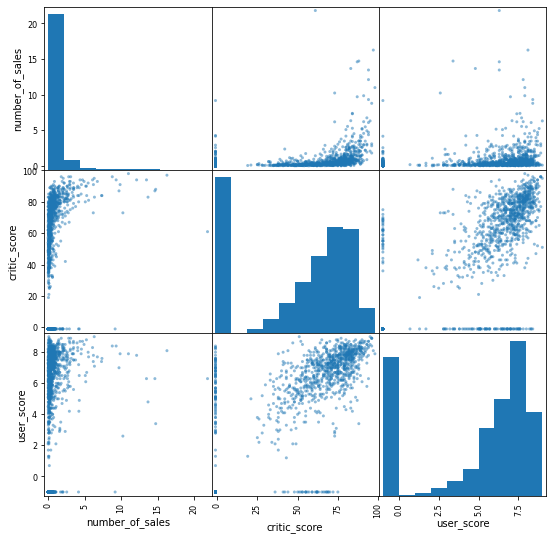

In [57]:
pd.plotting.scatter_matrix(df_scatter_xbox_360, figsize=(9, 9), grid=True)
plt.show()

#### Платформа `'wii'`

In [58]:
# создаем новую таблицу для платформы 'wii'
df_nintendo_wii = df[df['platform'] == 'wii']

# выводим на экран первые пять строк новой таблицы
display(df_nintendo_wii.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number_of_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


Для построения диаграммы рассеяния и определения корреляции данных, выделим необходимые нам столбцы в новую таблицу `'df_scatter_wii'`:

In [59]:
# выделяем необходимые нам для расчетов столбцы в новую таблицу 'df_scatter_wii'
df_scatter_wii = df_nintendo_wii[['number_of_sales', 'critic_score', 'user_score']]

# посмотрим на первые пять строк таблицы
display(df_scatter_wii.head())

,number_of_sales,critic_score,user_score
0,82.54,76.0,8.0
2,35.52,82.0,8.3
3,32.77,80.0,8.0
7,28.91,58.0,6.6
8,28.32,87.0,8.4


Посчитаем корреляцию между отзывами и продажами:

In [60]:
# считаем корреляцию
display(df_scatter_wii.corr())

,number_of_sales,critic_score,user_score
number_of_sales,1.000000,0.188386,0.182229
critic_score,0.188386,1.000000,0.795718
user_score,0.182229,0.795718,1.000000


Построим диаграмму рассеяния:

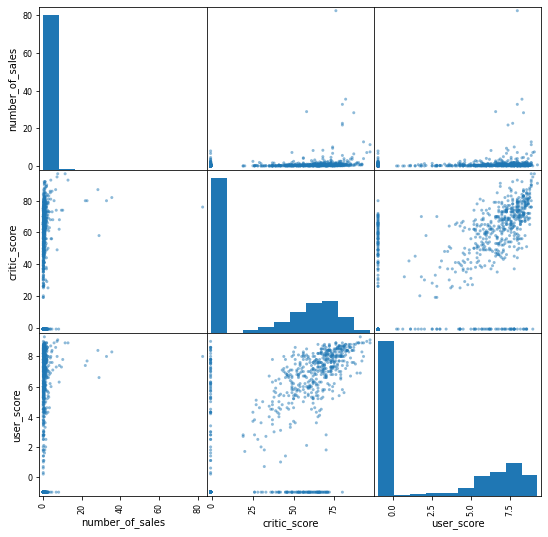

In [61]:
pd.plotting.scatter_matrix(df_scatter_wii, figsize=(9, 9), grid=True)
plt.show()

#### Вывод

В ходе анализа выяснилось, что между рейтингом пользователей и критиков существует положительная корреляция, причем довольно сильная (примерно 0.8), а вот между оценками и уровнем продаж есть положительная корреляция, но она либо очень слабая либо близка к нулю.

### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам и посмотрим, что можно сказать о самых прибыльных жанрах, а также выделяются ли жанры с высокими и низкими продажами.

Посмотрим на общее распределение игр по жанрам и выручке. Для этого создадим новую таблицу `'df_genre'` с нужными нам столбцами `'number_of_sales'` и `'name'`:

In [62]:
# группируем данные и сохраняем в новой таблице 'df_genre'
df_genre = (df.groupby(['genre']).agg({'number_of_sales':'sum', 'name':'count'})
                   .sort_values(by='number_of_sales', ascending=False))

# выведем получившуюся таблицу                  
display(df_genre)

,number_of_sales,name
genre,,
action,1716.52,3307
sports,1309.67,2306
shooter,1041.36,1296
role-playing,931.08,1481
platform,825.55,878
misc,790.29,1721
racing,723.49,1226
fighting,442.66,837
simulation,387.96,857


Построим график по количеству проданных игр, а также по количеству изданных игр в жанре:

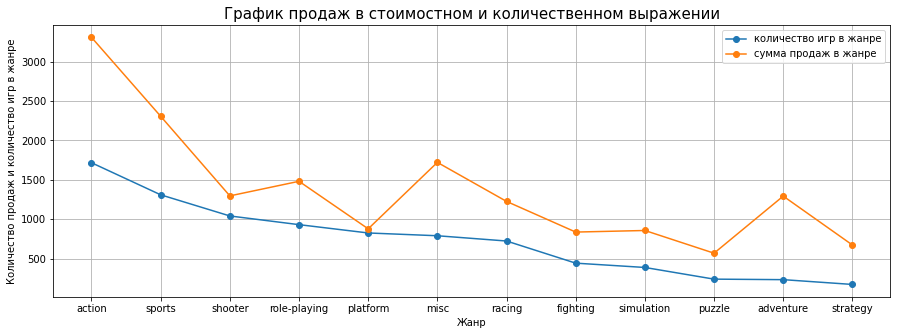

In [63]:
plt.figure(figsize=(15, 5))
plt.plot(df_genre, '-o')

plt.title('График продаж в стоимостном и количественном выражении', fontsize=15)
plt.xlabel('Жанр',fontsize=10)
plt.ylabel('Количество продаж и количество игр в жанре',fontsize=10)
plt.legend(['количество игр в жанре', 'сумма продаж в жанре'])
plt.grid(True)
plt.show()

**Вывод**

Как видим популярными жанрами являются `action`, `sports`, `shooter`, `role-playing` и `platform` в отличие от `strategy`, `adventure` и `puzzle`.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Примечание**

Столбец `"Rating"` содержит — рейтинг от организации **ESRB (англ. Entertainment Software Rating Board)**. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Пользователь региона `NA`

Посмотрим на самые популярные платформы (топ-5) для пользователей в регионе `'NA'`:

In [64]:
# составим новую таблицу для топ-5 платформ для пользователей в регионе 'NA'
df_user_na_platform = (df
                       .groupby(['platform'])                         # группируем данные по столбцу 'platform'
                       .agg({'na_sales':'sum'})                       # суммируем значения по столбцу 'na_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='na_sales', ascending=False)   # сортируем по убыванию столбец 'na_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_na_platform)

,platform,na_sales
28,x360,595.74
16,ps2,572.92
25,wii,486.87
17,ps3,390.13
4,ds,380.31


Посмотрим на самые популярные жанры (топ-5) для пользователей в регионе `'NA'`:

In [65]:
# составим новую таблицу для топ-5 жанров для пользователей в регионе 'NA'
df_user_na_genre = (df
                       .groupby(['genre'])                            # группируем данные по столбцу 'genre'
                       .agg({'na_sales':'sum'})                       # суммируем значения по столбцу 'na_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='na_sales', ascending=False)   # сортируем по убыванию столбец 'na_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_na_genre)

,genre,na_sales
0,action,863.17
10,sports,671.20
8,shooter,584.83
4,platform,444.44
3,misc,399.57


Проанализируем влияниет ли рейтинг ESRB на продажи в регионе `'NA'`:

In [66]:
# составим новую таблицу для анализа влияния рейтинга ESRB на продажи в регионе 'NA'
df_user_na_rating = (df
                       .groupby(['rating'])                           # группируем данные по столбцу 'rating'
                       .agg({'na_sales':'sum'})                       # суммируем значения по столбцу 'na_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='na_sales', ascending=False)   # сортируем по убыванию столбец 'na_sales'
                       .head())                                       # выводим первые пять строк таблицы
# выводим на экран таблицу
display(df_user_na_rating)

,rating,na_sales
2,E,1274.24
0,-1,1225.84
8,T,747.60
6,M,742.89
3,E10+,345.50


### Пользователь региона `EU`

Посмотрим на самые популярные платформы (топ-5) для пользователей в регионе `'EU'`:

In [67]:
# составим новую таблицу для топ-5 платформ для пользователей в регионе 'EU'
df_user_eu_platform = (df
                       .groupby(['platform'])                         # группируем данные по столбцу 'platform'
                       .agg({'eu_sales':'sum'})                       # суммируем значения по столбцу 'eu_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='eu_sales', ascending=False)   # сортируем по убыванию столбец 'eu_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_eu_platform)

,platform,eu_sales
16,ps2,332.63
17,ps3,327.21
28,x360,268.32
25,wii,258.32
15,ps,212.39


Посмотрим на самые популярные жанры (топ-5) для пользователей в регионе `'EU'`:

In [68]:
# составим новую таблицу для топ-5 жанров для пользователей в регионе 'eu'
df_user_eu_genre = (df
                       .groupby(['genre'])                            # группируем данные по столбцу 'genre'
                       .agg({'eu_sales':'sum'})                       # суммируем значения по столбцу 'eu_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='eu_sales', ascending=False)   # сортируем по убыванию столбец 'eu_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_eu_genre)

,genre,eu_sales
0,action,510.99
10,sports,371.33
8,shooter,314.52
6,racing,234.49
3,misc,210.60


Проанализируем влияниет ли рейтинг ESRB на продажи в регионе `'EU'`:

In [69]:
# составим новую таблицу для анализа влияния рейтинга ESRB на продажи в регионе 'EU'
df_user_eu_rating = (df
                       .groupby(['rating'])                           # группируем данные по столбцу 'rating'
                       .agg({'eu_sales':'sum'})                       # суммируем значения по столбцу 'eu_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='eu_sales', ascending=False)   # сортируем по убыванию столбец 'eu_sales'
                       .head())                                       # выводим первые пять строк таблицы
# выводим на экран таблицу
display(df_user_eu_rating)

,rating,eu_sales
2,E,703.87
0,-1,609.65
6,M,480.00
8,T,421.79
3,E10+,183.35


### Пользователь региона `JP`

Посмотрим на самые популярные платформы (топ-5) для пользователей в регионе `'JP'`:

In [70]:
# составим новую таблицу для топ-5 платформ для пользователей в регионе 'JP'
df_user_jp_platform = (df
                       .groupby(['platform'])                         # группируем данные по столбцу 'platform'
                       .agg({'jp_sales':'sum'})                       # суммируем значения по столбцу 'jp_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='jp_sales', ascending=False)   # сортируем по убыванию столбец 'jp_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_jp_platform)

,platform,jp_sales
4,ds,175.02
15,ps,139.78
16,ps2,137.54
23,snes,116.55
2,3ds,100.62


Посмотрим на самые популярные жанры (топ-5) для пользователей в регионе `'JP'`:

In [71]:
# составим новую таблицу для топ-5 жанров для пользователей в регионе 'jp'
df_user_jp_genre = (df
                       .groupby(['genre'])                            # группируем данные по столбцу 'genre'
                       .agg({'jp_sales':'sum'})                       # суммируем значения по столбцу 'jp_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='jp_sales', ascending=False)   # сортируем по убыванию столбец 'jp_sales'
                       .head())                                       # выводим первые пять строк таблицы (топ-5)
# выводим на экран таблицу
display(df_user_jp_genre)

,genre,jp_sales
7,role-playing,353.39
0,action,160.14
10,sports,134.93
4,platform,130.71
3,misc,107.02


Проанализируем влияниет ли рейтинг ESRB на продажи в регионе `'JP'`:

In [72]:
# составим новую таблицу для анализа влияния рейтинга ESRB на продажи в регионе 'JP'
df_user_jp_rating = (df
                       .groupby(['rating'])                           # группируем данные по столбцу 'rating'
                       .agg({'jp_sales':'sum'})                       # суммируем значения по столбцу 'jp_sales'
                       .reset_index()                                 # обновляем индексы
                       .sort_values(by='jp_sales', ascending=False)   # сортируем по убыванию столбец 'jp_sales'
                       .head())                                       # выводим первые пять строк таблицы
# выводим на экран таблицу
display(df_user_jp_rating)

,rating,jp_sales
0,-1,836.74
2,E,197.96
8,T,150.70
6,M,63.58
3,E10+,40.20


### Вывод

В каждом отдельном регионе (`NA`, `EU`, `JP`) рейтинг `ESRB` на продажи практически не влияет. Лидерами продаж в регионах (`NA`, `EU`, `JP`) являются игры с одинаковыми рейтингами, чем доступнее для потребителя рейтинг тем более продаваемая игра.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В нашем случае проверяем двухстороннюю гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Проверять будем на полной генеральной совокупности, путем формирования нулевой и альтернатвной гипотез.

**Гипотезы**

- H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

для проверки гипотез необходимо подключить модуль `'scipy'`:

In [73]:
from scipy import stats as st

Определим средние пользовательские рейтинги платформ `"Xbox One"` и `"PC"`:

In [74]:
# запишем средний пользовательский рейтинг платформы "Xbox One" в переменную xbox_one_rating
# и округлим значение до двух знаков после запятой
xbox_one_rating = round(df.query('platform == "x360"')['user_score'].mean(), 2)

# выведем значение на экран
print('Средний пользовательский рейтинг платформы "Xbox One" =', xbox_one_rating)

Средний пользовательский рейтинг платформы "Xbox One" = 4.89


In [75]:
# запишем средний пользовательский рейтинг платформы "PC" в переменную pc_rating
# и округлим значение до двух знаков после запятой
pc_rating = round(df.query('platform == "pc"')['user_score'].mean(), 2)

# выведем значение на экран
print('Средний пользовательский рейтинг платформы "PC" =', pc_rating)

Средний пользовательский рейтинг платформы "PC" = 5.36


Пороговое значение **`alpha`** определим равным **0.05**

In [76]:
# критический уровень статистической значимости
alpha = 0.05

In [77]:
# используем метод st.ttest_ind
results = st.ttest_ind( 
    df.query('platform == "x360"')['user_score'],
    df.query('platform == "pc"')['user_score'])

# выводим p-value из результата
print('p-значение:', results.pvalue)

# сравниваем полученный и критический уровни значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0018832955368821075
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

В нашем случае проверяем двухстороннюю гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Проверять будем на полной генеральной совокупности, путем формирования нулевой и альтернатвной гипотез.

**Гипотезы**

- H0: средние пользовательские рейтинги жанров Action и Sports разные

- H1: средние пользовательские рейтинги жанров Action и Sports одинаковые

Определим средние пользовательские рейтинги жанров `"Action"` и `"Sports"`:

In [78]:
# запишем средний пользовательский рейтинг жанра "Action" в переменную genre_action_rating
# и округлим значение до двух знаков после запятой
genre_action_rating = round(df.query('genre == "action"')['user_score'].mean(), 2)

# выведем значение на экран
print('Средний пользовательский рейтинг жанра "Action" =', genre_action_rating)

Средний пользовательский рейтинг жанра "Action" = 3.38


In [79]:
# запишем средний пользовательский рейтинг жанра "Sports" в переменную genre_sports_rating
# и округлим значение до двух знаков после запятой
genre_sports_rating = round(df.query('genre == "sports"')['user_score'].mean(), 2)

# выведем значение на экран
print('Средний пользовательский рейтинг жанра "Sports" =', genre_sports_rating)

Средний пользовательский рейтинг жанра "Sports" = 2.73


Пороговое значение **`alpha`** оставляем равным **0.05**

In [80]:
# используем метод st.ttest_ind
results = st.ttest_ind( 
    df.query('genre == "action"')['user_score'],
    df.query('genre == "sports"')['user_score'])

# выводим p-value из результата
print('p-значение:', results.pvalue)

# сравниваем полученный и критический уровни значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.872830248017442e-09
Отвергаем нулевую гипотезу


### Вывод

**Вывод**

При проведении проверки нулевой и альтернативной гипотез "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные" получили вывод, что нулевую гипотезу отвергаем. 

## Общий вывод

Мы подключили датасет и изучили находящиеся в нем данные. 

Провели с данными предварительную обработку, а именно: 
- привели столбцы и значения столбцов к нижнему регистру, 
- обработали неявные и явные дубликаты, 
- привели данные к необходимому для аналитических расчетов типу, 
- обработали пропущенные значения, 
- добавили в датасет новый столбец по суммарным продажам во всех регионах. 

Провели исследовательский анализ данных и проанализировали:
- количество игр, выпущенных в разные годы (начиная с 2008 года и позднее мы выявили падение количества),
- изменение продаж по платформам,
- определили платформы с наибольшими суммарными продажами,
- построили распределение продаж по годам,

- высчитали характерный срок появления новых и исчезновения старых платформ: 
Ориентировочный срок за который появляются новые и исчезают старые платформы составляет 12 лет. Среднее значение срока за который появляются новые и исчезают старые платформы составляет 7.7 лет.),

- определили актуальный период и потенциально прибыльные платформы:
В топ-5 самых потенциально прибыльных платформ вошли: 
* 1 место - PlayStation 3
* 2 место (с небольшим отрывом от PS3) - Xbox 360
* 3 место - Nintendo Wii
* 4 место - Nintendo DS
* 5 место - PlayStation 4

Возможно с появлением мобильных гаджетов нового поколения продажи платформ заметно снижались, а первые три места топа значительно опережают остальных, возможно они пользовались большим спросом из-за широкого круга покупателей и ценовой категорией на продукт.
- построили график «ящик с усами» по глобальным продажам игр,
- определили влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков: выявили, что есть положительная корреляция между рейтингом пользователей и рейтингом критиков, а между оценками и уровнем продаж значимой корреляции нет,
- соотнесли выводы с продажами игр на других платформах: выяснилось, что между рейтингом пользователей и критиков существует положительная корреляция, причем довольно сильная (примерно 0.8), а вот между оценками и уровнем продаж есть положительная корреляция, но она либо очень слабая либо близка к нулю.,
- выяснили, что популярными жанрами являются `action`, `sports`, `shooter`, `role-playing` и `platform` в отличие от `strategy`, `adventure` и `puzzle`.

При проведении проверки нулевой и альтернативной гипотез "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные" получили вывод, что нулевую гипотезу отвергаем. Но следует отметить, что никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Они могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты.